# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

# **Load Dataset & Check Info.**

In [2]:
df_dataset = pd.read_csv('./Datasource/Quiz1 Class Train.csv')
df_dataset

,x1,x2,x3,x4,x5,y
0,-17.20,30.38,7.48,26.15,21.32,B
1,5.23,-11.30,-4.49,-8.77,-6.76,A
2,2.31,6.24,9.27,13.17,-3.58,B
3,1.24,6.91,8.41,14.41,-2.43,B
4,10.53,-23.79,-9.82,-23.38,-12.86,A
...,...,...,...,...,...,...
185,24.23,-34.07,-4.41,15.78,-37.05,B
186,5.88,-25.08,-18.39,-14.31,-9.34,A
187,0.53,1.10,2.35,-5.73,0.57,A
188,13.01,-36.62,-21.88,-1.76,-21.85,A


In [3]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   y       190 non-null    object 
dtypes: float64(5), object(1)
memory usage: 9.0+ KB


# **Explore Dataset**

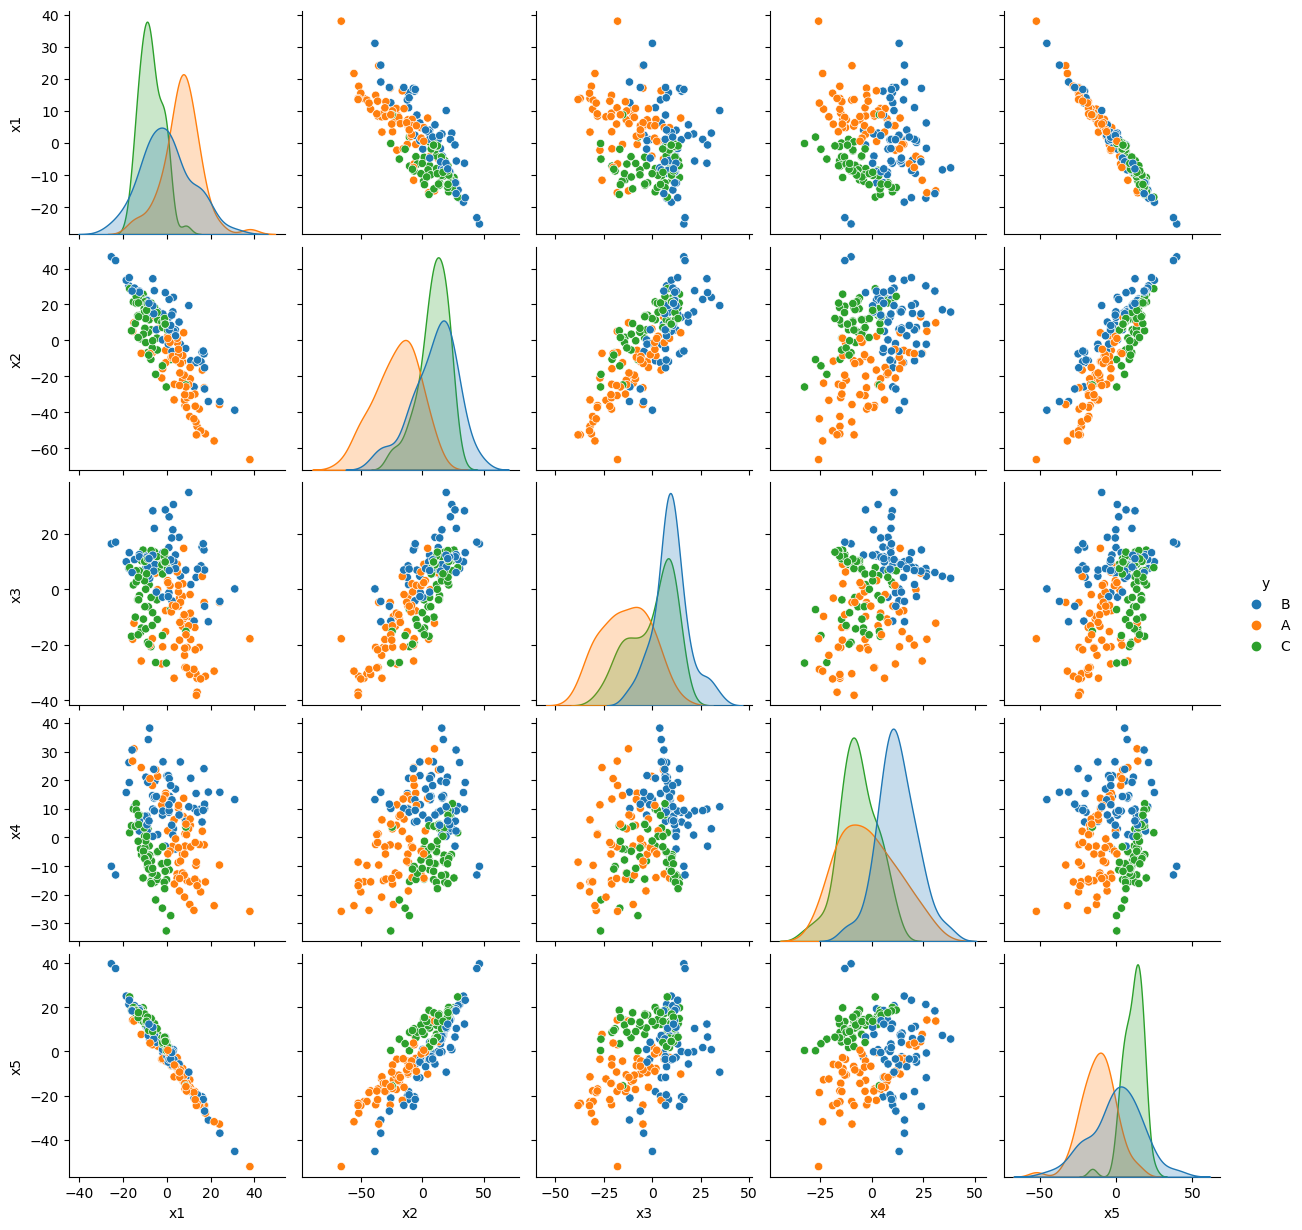

In [4]:
sns.pairplot(df_dataset,hue="y")

# **Create Model**

In [5]:
X = df_dataset[["x1",	"x2",	"x3",	"x4","x5"]]
y = df_dataset["y"]

running ... (8,5)
[ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63 127 128 129 13

/Users/phukphoom/miniconda3/envs/DA/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


running ... (11,9)
[ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63 127 128 129 1

<AxesSubplot: >

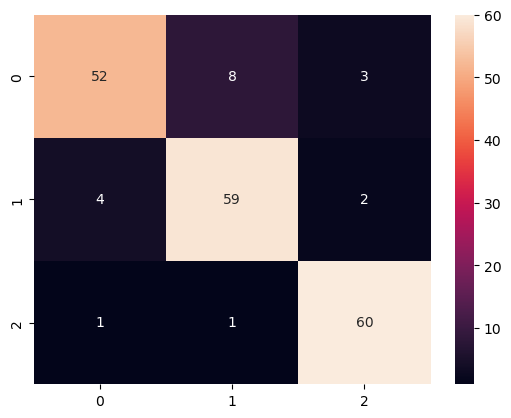

In [7]:
kf = KFold(n_splits=3)

best_height, best_width = 1, 1

best_sum_score, best_sum_cf_mtx = 0, np.zeros((3, 3))
for height in range(8,12):
  for width in range(5,10):
    print(f'running ... ({height},{width})')

    sum_score, sum_cf_mtx = 0, np.zeros((3, 3));
    for train_index, test_index in kf.split(X):
      print(train_index,test_index)
      X_train, X_test = X.loc[train_index], X.loc[test_index]
      y_train, y_test = y.loc[train_index], y.loc[test_index]

      model = MLPClassifier(hidden_layer_sizes=(height, width), max_iter=5000)
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      cf_mtx = confusion_matrix(y_test, y_pred)

      for i in range(3):
        for j in range(3):
          sum_cf_mtx[i][j] += cf_mtx[i][j]
          if i == j:
            sum_score += cf_mtx[i][j]

    if sum_score >= best_sum_score:
      best_height, best_width, best_sum_score, best_sum_cf_mtx = height, width, sum_score, sum_cf_mtx

print(f'(best) sum_score: {best_sum_score}/{len(df_dataset.index)} = {best_sum_score/len(df_dataset.index)*100}% at (height, width) : ({best_height},{best_width})')
sns.heatmap(best_sum_cf_mtx, annot=True)

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(best_height, best_width), max_iter=5000)
model.fit(X, y)

MLPClassifier(hidden_layer_sizes=(11, 7), max_iter=5000)

# **Predict Unseen Data**

In [ ]:
df_unseen = pd.read_csv('./Datasource/Quiz1 Class Unseen.csv')
df_unseen

model.predict(df_unseen)

array(['B', 'C', 'A', 'C', 'A', 'A', 'C', 'B', 'C', 'C'], dtype='<U1')